# HEV genome comparisons within RESCRIPt

We'll use [RESCRIPt](https://github.com/bokulich-lab/RESCRIPt) and my repo fork of  [q2-sourmash](https://github.com/mikerobeson/q2-sourmash/), to perform a basic comparison of genomes.


In [1]:
import os
import qiime2 as q2
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import skbio
from q2_types.feature_data import DNAIterator, DNAFASTAFormat
from qiime2.plugins import rescript, sample_classifier as sc, diversity as q2d, sourmash as sour, emperor
import_data = q2.Artifact.import_data
%matplotlib inline

# Get Genomes

Grab *Hapatitis E Virus* available at: https://www.ncbi.nlm.nih.gov/labs/virus/vssi/#/virus?SeqType_s=Nucleotide&Completeness_s=complete&VirusLineage_ss=Hepatitis%20E%20virus,%20taxid:12461


I removed data with few representatives and only looked at humans.

In [2]:
accessions = q2.Metadata.load('human-md.txt')

In [3]:
seqs, tax, = rescript.actions.get_ncbi_data(
    accession_ids=accessions,
    rank_propagation=False,
    n_jobs=4)

# Run Sourmash

In [4]:
minhash, = sour.actions.compute_fasta(sequence_file=seqs, ksizes=21, scaled=1000)

In [5]:
comparison, = sour.actions.compare(minhash, ksize=21)

# Diversity analysis and source prediction

In [6]:
pcs, = q2d.actions.pcoa(comparison)
pcplot, = emperor.actions.plot(pcs, metadata=accessions)
pcplot.save('emperor-plot.qzv')

/Users/mike/AnalysisSoftware/miniconda3/envs/qiime2-2020.8-test/lib/python3.6/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:152: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.06360644880390402 and the largest is 8.812219319111529.
  RuntimeWarning


'emperor-plot.qzv'

In [7]:
q2.Visualization.load('emperor-plot.qzv')

<visualization: Visualization uuid: 5b840440-9bcb-4afc-8855-db9633360210>

<Figure size 432x288 with 0 Axes>

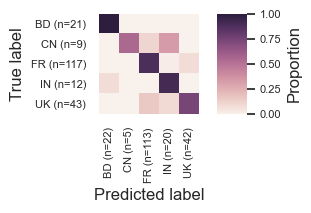

In [8]:
pred, accuracy, = sc.actions.classify_samples_from_dist(
    comparison, metadata=accessions.get_column('Geo_Location_Abbreviation'), k=3)

In [9]:
accuracy

<visualization: Visualization uuid: 606aba0b-f59d-4ebc-973c-7198fe8bc395>

In [10]:
accuracy.save('model_accuracy.qzv')

'model_accuracy.qzv'

# view distance matrix

In [11]:
dm = comparison.view(skbio.DistanceMatrix)
df = dm.to_data_frame()
df

,DQ459342.1,FJ457024.1,HM439284.1,HQ389543.1,JF443717.1,JF443718.1,JF443719.1,JF443720.1,JF443721.1,JF443722.1,...,MN401237.1,MN401238.1,MN646689.1,MN646690.1,MN646691.1,MN646692.1,MN646693.1,MN646694.1,MN646695.1,MN646696.1
DQ459342.1,0.000000,0.928571,1.0,1.0,0.833333,0.166667,0.444444,0.800000,1.0,1.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000
FJ457024.1,0.928571,0.000000,1.0,1.0,0.956522,0.923077,0.866667,0.750000,1.0,1.0,...,1.000000,0.894737,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000
HM439284.1,1.000000,1.000000,0.0,1.0,1.000000,1.000000,1.000000,1.000000,1.0,1.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000
HQ389543.1,1.000000,1.000000,1.0,0.0,1.000000,1.000000,1.000000,1.000000,1.0,1.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000
JF443717.1,0.833333,0.956522,1.0,1.0,0.000000,0.823529,0.850000,0.833333,1.0,1.0,...,1.000000,0.920000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MN646692.1,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.0,1.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.909091,1.0,0.200000,1.000000
MN646693.1,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.0,1.0,...,1.000000,1.000000,0.916667,0.923077,0.923077,0.909091,0.000000,1.0,0.916667,0.909091
MN646694.1,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.0,1.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000
MN646695.1,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.0,1.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.200000,0.916667,1.0,0.000000,1.000000


In [12]:
# just sanity check tht there are no negative values
(df < 0).any().any()

False

In [13]:
locations = accessions.to_dataframe().loc[:,'Geo_Location_Abbreviation']
locations

id
MN646689.1    FR
MN646690.1    FR
MN646691.1    FR
MN646692.1    FR
MN646693.1    FR
              ..
JQ679014.1    UK
HQ389543.1    UK
HM439284.1    CN
FJ457024.1    IN
DQ459342.1    IN
Name: Geo_Location_Abbreviation, Length: 202, dtype: object

In [14]:
unique_locations = list(pd.unique(locations))
unique_locations

['FR', 'BD', 'UK', 'CN', 'IN']

In [15]:
len(unique_locations)

5

In [16]:
# pal = sns.husl_palette(5, s=.45)
pal =sns.color_palette("viridis",5)
pal

[(0.267968, 0.223549, 0.512008),
 (0.190631, 0.407061, 0.556089),
 (0.127568, 0.566949, 0.550556),
 (0.20803, 0.718701, 0.472873),
 (0.565498, 0.84243, 0.262877)]

In [17]:
pal_dict = dict(zip(map(str, unique_locations), pal))
pal_dict

{'FR': (0.267968, 0.223549, 0.512008),
 'BD': (0.190631, 0.407061, 0.556089),
 'UK': (0.127568, 0.566949, 0.550556),
 'CN': (0.20803, 0.718701, 0.472873),
 'IN': (0.565498, 0.84243, 0.262877)}

In [20]:
locations_df = accessions.to_dataframe().loc[:,['Geo_Location_Abbreviation']]
locations_df

,Geo_Location_Abbreviation
id,
MN646689.1,FR
MN646690.1,FR
MN646691.1,FR
MN646692.1,FR
MN646693.1,FR
...,...
JQ679014.1,UK
HQ389543.1,UK
HM439284.1,CN


In [21]:
locations_df.loc[:,"Country"] = locations_df.loc[:, "Geo_Location_Abbreviation"].apply(lambda x: pal_dict[x])

In [22]:
locations_df

,Geo_Location_Abbreviation,Country
id,,
MN646689.1,FR,"(0.267968, 0.223549, 0.512008)"
MN646690.1,FR,"(0.267968, 0.223549, 0.512008)"
MN646691.1,FR,"(0.267968, 0.223549, 0.512008)"
MN646692.1,FR,"(0.267968, 0.223549, 0.512008)"
MN646693.1,FR,"(0.267968, 0.223549, 0.512008)"
...,...,...
JQ679014.1,UK,"(0.127568, 0.566949, 0.550556)"
HQ389543.1,UK,"(0.127568, 0.566949, 0.550556)"
HM439284.1,CN,"(0.20803, 0.718701, 0.472873)"


In [23]:
gloc_colors = locations_df.loc[:,"Country"]
gloc_colors

id
MN646689.1    (0.267968, 0.223549, 0.512008)
MN646690.1    (0.267968, 0.223549, 0.512008)
MN646691.1    (0.267968, 0.223549, 0.512008)
MN646692.1    (0.267968, 0.223549, 0.512008)
MN646693.1    (0.267968, 0.223549, 0.512008)
                           ...              
JQ679014.1    (0.127568, 0.566949, 0.550556)
HQ389543.1    (0.127568, 0.566949, 0.550556)
HM439284.1    (0.20803, 0.718701, 0.472873) 
FJ457024.1    (0.565498, 0.84243, 0.262877) 
DQ459342.1    (0.565498, 0.84243, 0.262877) 
Name: Country, Length: 202, dtype: object

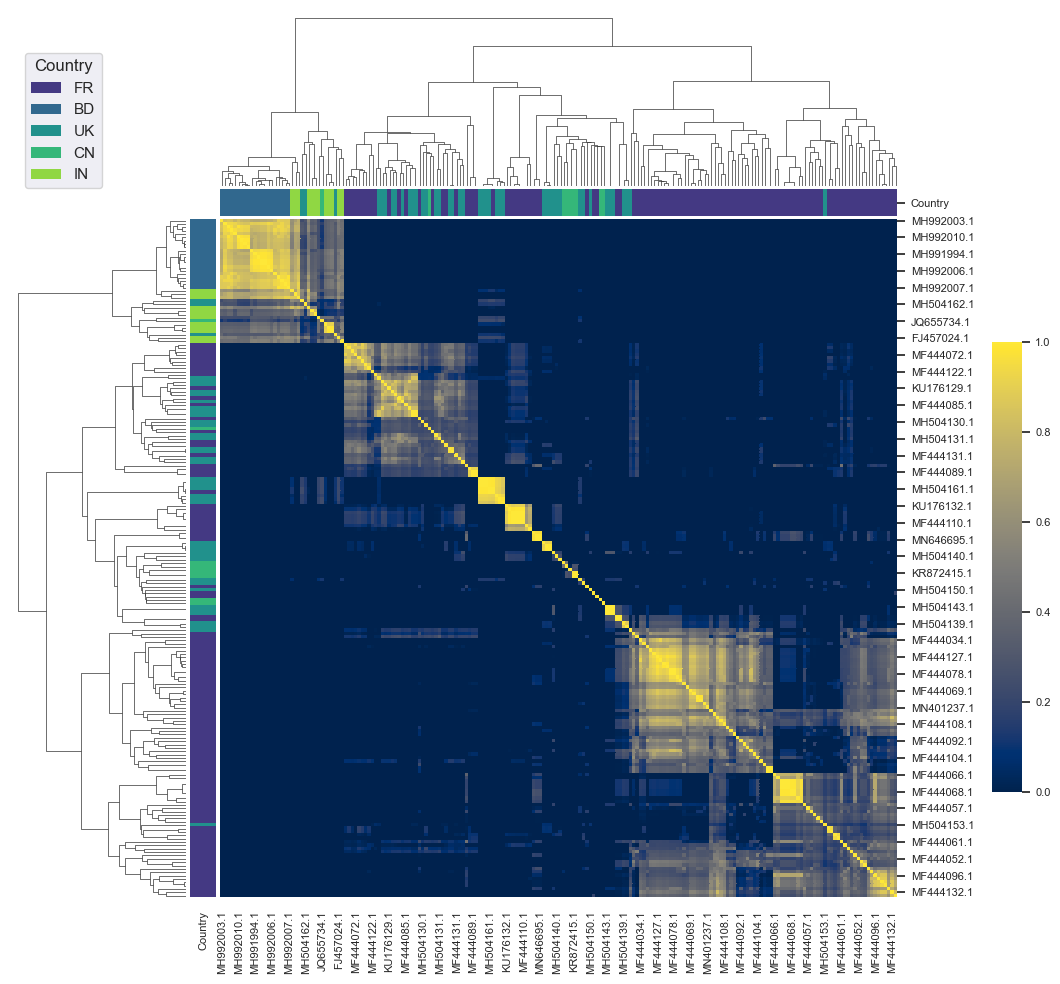

In [24]:
g = sns.clustermap(df.corr(), 
                   row_colors=gloc_colors, 
                   col_colors=gloc_colors, 
                   cmap="cividis", 
                   vmin=0,
                   dendrogram_ratio=0.2)

# Draw the legend bar
for label in unique_locations:
    g.ax_col_dendrogram.bar(0, 0, color=pal_dict[label],
                            label=label, linewidth=0)

    g.ax_col_dendrogram.legend(loc="upper left", ncol=1, title='Country', bbox_to_anchor=(-0.30, 0.8))

# Adjust the postion of the main colorbar for the heatmap
g.cax.set_position([1., .2, .03, .45])